# Lead Scoring Case Study

### Problem statement

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Business goal
X Education wants to build a model to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Outline
We will proceed according to the following steps for analyzing the data, building the model, doing the predictions and validating them:

1. Reading and understanding the data
1. Data cleaning
1. Exploratory data analysis
1. Data preparation
1. Splitting the data into training and test sets
1. Feature scaling
1. Checking correlations within the data
1. Building a logistic regression model
1. Inspecting the confusion matrix and other metrics
1. Plotting the ROC curve and finding the optimal cutoff
1. Making predictions using the final model
1. Model evaluation

## Step 1: Reading and understanding the data

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data handling
import numpy as np
import pandas as pd

In [3]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read in the Leads dataset
leads_data = pd.read_csv('./Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Look at the size of the data
leads_data.shape

(9240, 37)

In [6]:
# Look at the statistical aspects of the data
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Look at the metadata
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see, there are a lot of null values in several columns. We shall need to fix those to be able to do a proper data analysis.

## Step 2: Data cleaning

From the data inspection, we observed that there are several fields containing the `Select` value. This must be because the user did not select any option for the dropdown list.

We need to address these values by converting them to nulls as they are essentially null values for the analysis.

In [8]:
# Look at the percentage of values for each column that have 'Select' in them
for col in leads_data.columns:
    select_perc = sum(leads_data[col] == 'Select') * 100.0 / len(leads_data)
    print(col, select_perc)

Prospect ID 0.0
Lead Number 0.0
Lead Origin 0.0
Lead Source 0.0
Do Not Email 0.0
Do Not Call 0.0
Converted 0.0
TotalVisits 0.0
Total Time Spent on Website 0.0
Page Views Per Visit 0.0
Last Activity 0.0
Country 0.0
Specialization 21.017316017316016
How did you hear about X Education 54.577922077922075
What is your current occupation 0.0
What matters most to you in choosing a course 0.0
Search 0.0
Magazine 0.0
Newspaper Article 0.0
X Education Forums 0.0
Newspaper 0.0
Digital Advertisement 0.0
Through Recommendations 0.0
Receive More Updates About Our Courses 0.0
Tags 0.0
Lead Quality 0.0
Update me on Supply Chain Content 0.0
Get updates on DM Content 0.0
Lead Profile 44.87012987012987
City 24.33982683982684
Asymmetrique Activity Index 0.0
Asymmetrique Profile Index 0.0
Asymmetrique Activity Score 0.0
Asymmetrique Profile Score 0.0
I agree to pay the amount through cheque 0.0
A free copy of Mastering The Interview 0.0
Last Notable Activity 0.0


As we can see, there are 4 columns which have `Select` as a value and that is present in a significant percentage. We may have to drop these columns, but first we will convert them into nulls so that cleaning can be a little easier.

In [9]:
leads_data = leads_data.replace('Select', np.nan)

In [10]:
# Let's check again if everything got fixed
for col in leads_data.columns:
    select_perc = sum(leads_data[col] == 'Select') * 100.0 / len(leads_data)
    print(col, select_perc)

Prospect ID 0.0
Lead Number 0.0
Lead Origin 0.0
Lead Source 0.0
Do Not Email 0.0
Do Not Call 0.0
Converted 0.0
TotalVisits 0.0
Total Time Spent on Website 0.0
Page Views Per Visit 0.0
Last Activity 0.0
Country 0.0
Specialization 0.0
How did you hear about X Education 0.0
What is your current occupation 0.0
What matters most to you in choosing a course 0.0
Search 0.0
Magazine 0.0
Newspaper Article 0.0
X Education Forums 0.0
Newspaper 0.0
Digital Advertisement 0.0
Through Recommendations 0.0
Receive More Updates About Our Courses 0.0
Tags 0.0
Lead Quality 0.0
Update me on Supply Chain Content 0.0
Get updates on DM Content 0.0
Lead Profile 0.0
City 0.0
Asymmetrique Activity Index 0.0
Asymmetrique Profile Index 0.0
Asymmetrique Activity Score 0.0
Asymmetrique Profile Score 0.0
I agree to pay the amount through cheque 0.0
A free copy of Mastering The Interview 0.0
Last Notable Activity 0.0


Yes, all `Select` values have been addressed.

Now, let's look at the percentage of missing values.

In [11]:
leads_data.isnull().sum() * 100.0 / len(leads_data.index)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

A lot of columns have a large percentage of missing values.

DECISION: Let's drop those columns that have more than 30% missing values.

In [12]:
# Dropping columns with large percentage of missing values
for col in leads_data.columns:
    null_perc = sum(leads_data[col].isnull()) * 100.0 / len(leads_data)
    if null_perc >= 30.0:
        leads_data.drop(col, axis=1, inplace=True)

In [13]:
# Again check the percentage of nulls
leads_data.isnull().sum() * 100.0 / len(leads_data.index)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

There are only 3 columns now with a large percentage of nulls. Let's deal with them.

In [14]:
# `Country` column
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

As seen above, this is a highly skewed variable as most of the values are `India`. So we can drop this variable since it won't be of much help as an input to our model.

In [15]:
# Drop the Country column
leads_data.drop('Country', axis=1, inplace=True)

In [16]:
# Next, let's check the Occupation column
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

This variable is also highly skewed. If we try to impute the missing values with the mode of this variable, it would end up making it even more skewed.

Can we drop the rows containing missing values instead? We could end up losing ~30% of our data in that case and the variable is skewed so it won't help our analysis in a big way.

Let's also check the what matters column.

In [17]:
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Again, this is an even more skewed variable.

DECISION: Let's drop these two columns.

In [18]:
leads_data.drop(['What is your current occupation', 'What matters most to you in choosing a course'], axis=1, inplace=True)

In [19]:
# Again check the percentage of nulls
leads_data.isnull().sum() * 100.0 / len(leads_data.index)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

This data looks to be in much better shape now. There are still a few columns with missing values but their percentage is very small. We can choose to drop those rows with missing values without much loss.

In [20]:
leads_data.dropna(inplace=True)

Let's check the missing values one last time and confirm that everything has been addressed.

In [21]:
# Again check the percentage of nulls
leads_data.isnull().sum() * 100.0 / len(leads_data.index)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

Now, the `Prospect ID` and `Lead Number` variables are identifiers and are probably unique across the data set. So they won't be of much use for the data analysis and model building. It's better if we drop these columns.

In [22]:
# Drop Prospect ID and Lead Number
leads_data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [23]:
# Check the data fields again
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Search                                    9074 non-null   object 
 10  Magazine                            

Everything looks good; we are ok to go ahead with the next step.

## Step 3: Exploratory data analysis

Let's visualize the data and see if we observe any patterns and know which are the most important variables.

In [24]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [25]:
leads_data['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

The target variable is `Converted`.

Let's draw count-plots of the categorical variables against the target variable.

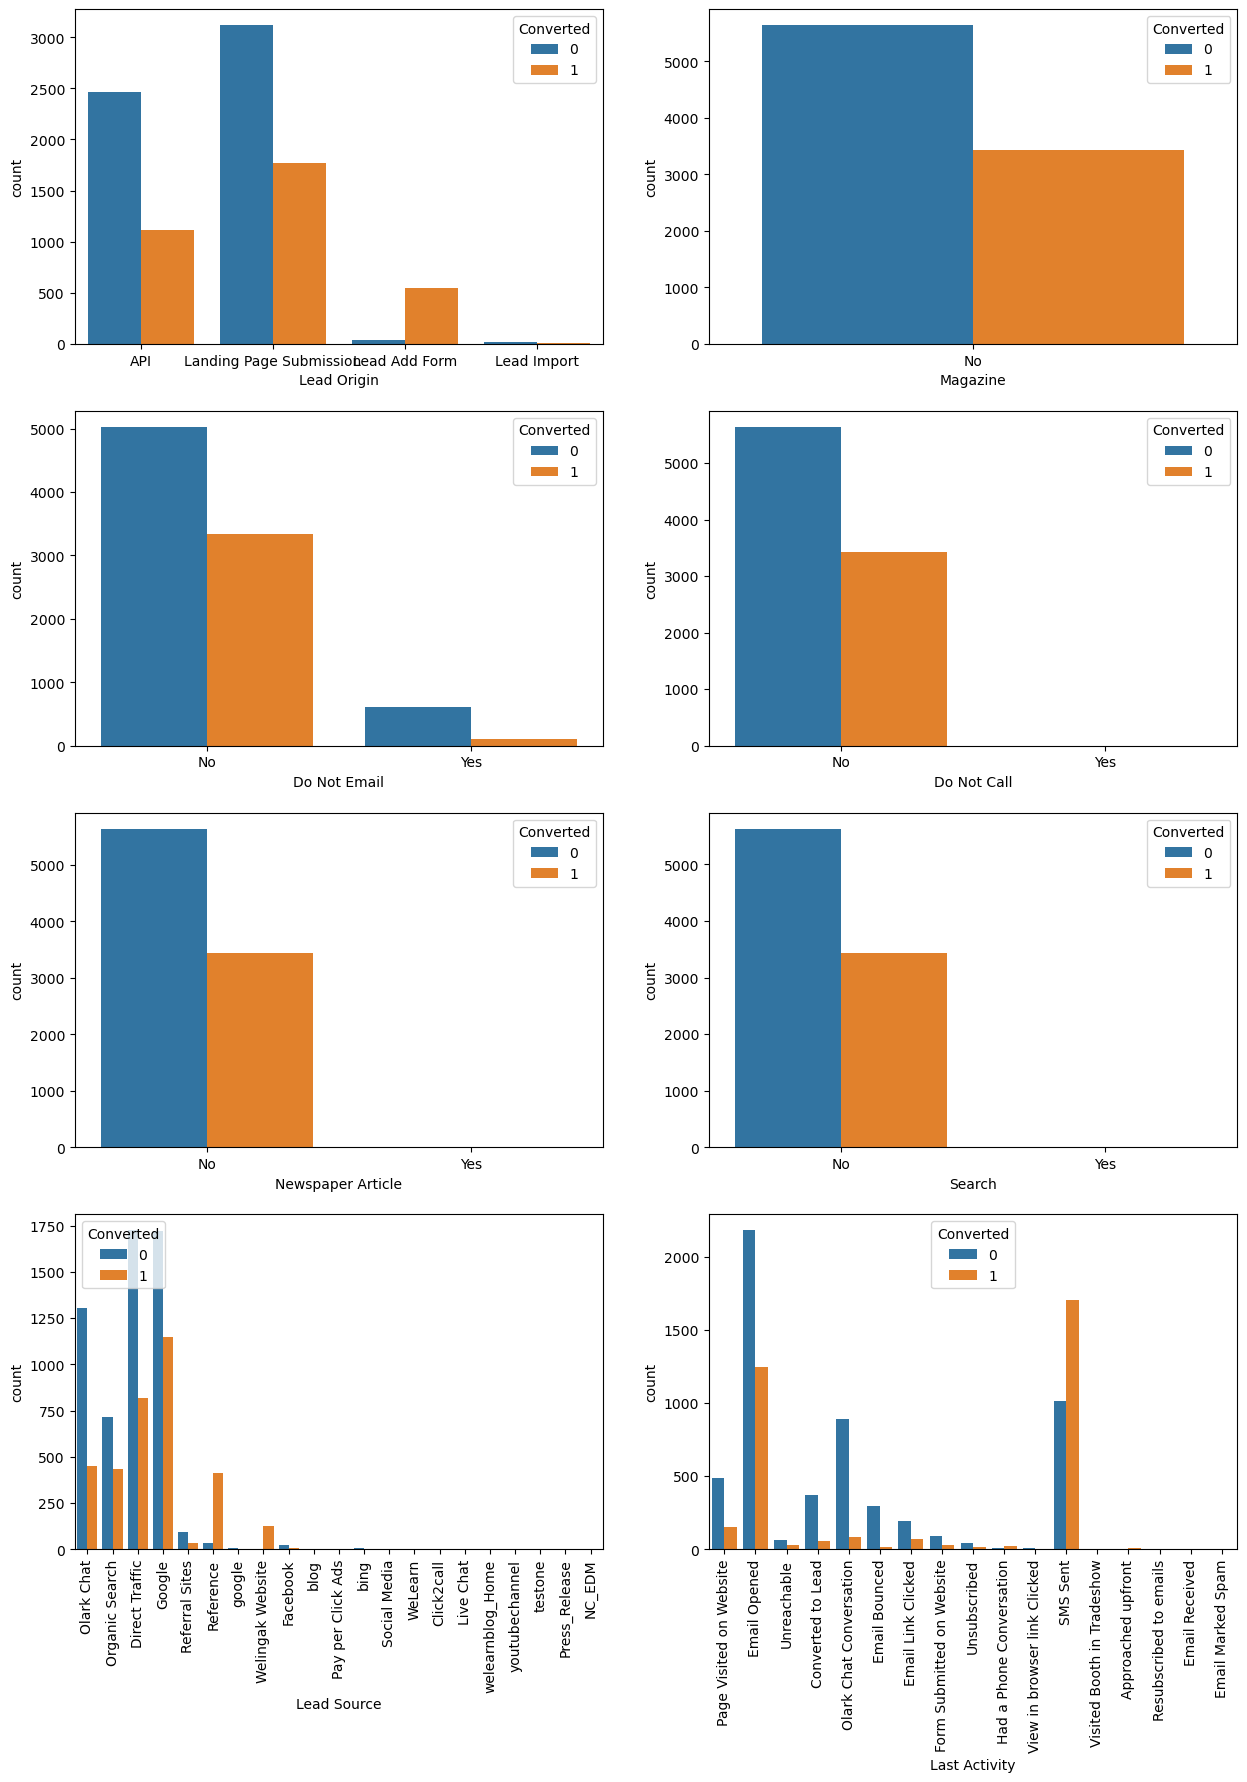

In [26]:
# Draw the count plots
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data=leads_data)
plt.subplot(4,2,2)
sns.countplot(x='Magazine', hue='Converted', data=leads_data)
plt.subplot(4,2,3)
sns.countplot(x='Do Not Email', hue='Converted', data=leads_data)
plt.subplot(4,2,4)
sns.countplot(x='Do Not Call', hue='Converted', data=leads_data)
plt.subplot(4,2,5)
sns.countplot(x='Newspaper Article', hue='Converted', data=leads_data)
plt.subplot(4,2,6)
sns.countplot(x='Search', hue='Converted', data=leads_data)
plt.subplot(4,2,7)
sns.countplot(x='Lead Source', hue='Converted', data=leads_data)
plt.xticks(rotation = 90)
plt.subplot(4,2,8)
sns.countplot(x='Last Activity', hue='Converted', data=leads_data)
plt.xticks(rotation = 90)
plt.show()

Let's visualize the other categorical variables as well.

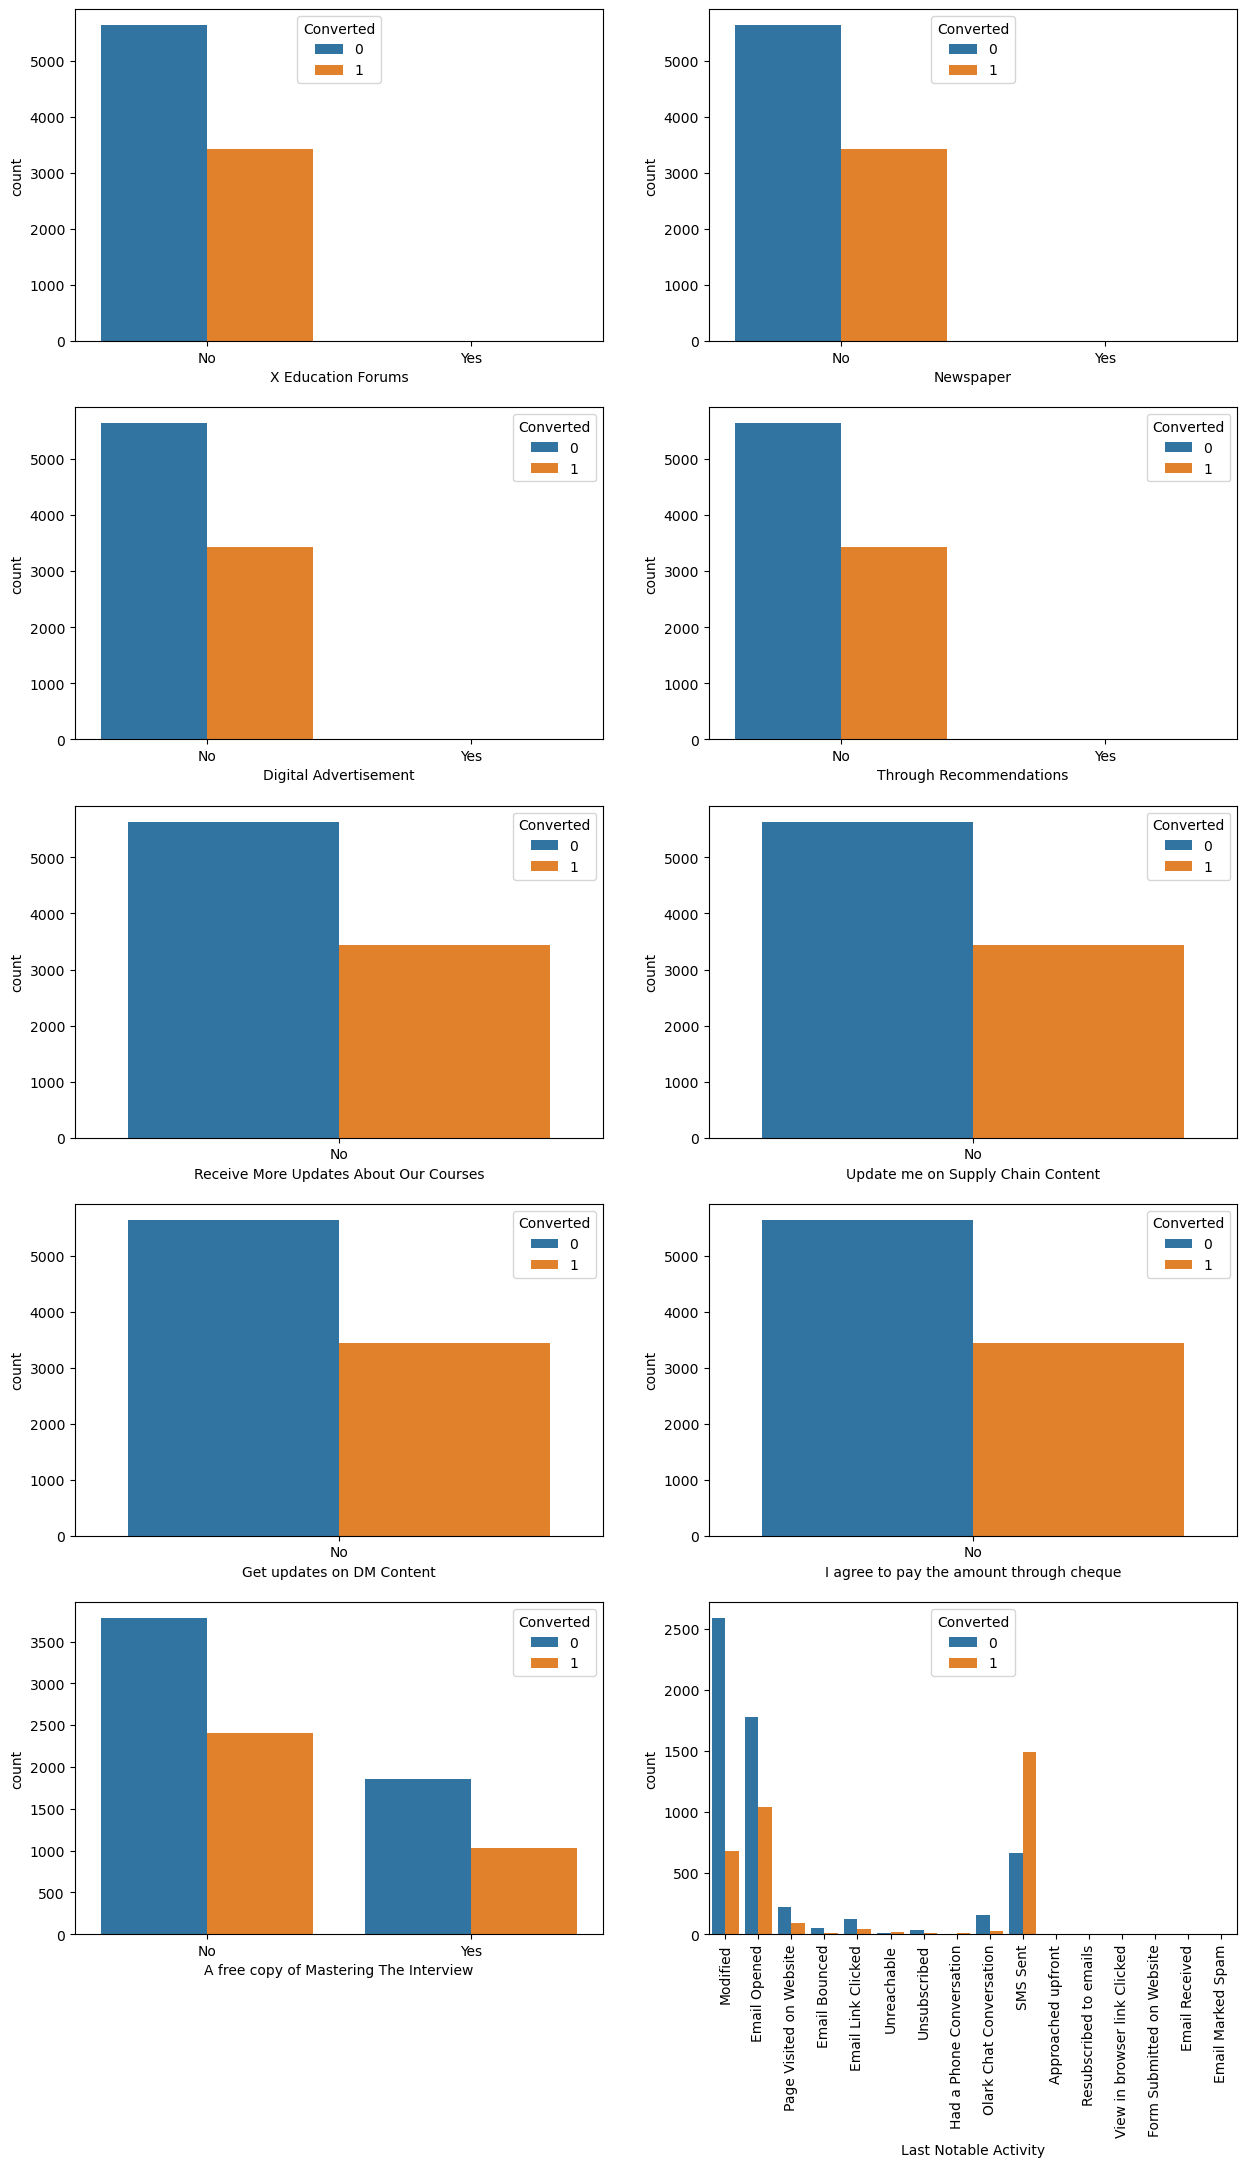

In [27]:
# Draw the count plots
plt.figure(figsize=(15, 25))
plt.subplot(5,2,1)
sns.countplot(x='X Education Forums', hue='Converted', data=leads_data)
plt.subplot(5,2,2)
sns.countplot(x='Newspaper', hue='Converted', data=leads_data)
plt.subplot(5,2,3)
sns.countplot(x='Digital Advertisement', hue='Converted', data=leads_data)
plt.subplot(5,2,4)
sns.countplot(x='Through Recommendations', hue='Converted', data=leads_data)
plt.subplot(5,2,5)
sns.countplot(x='Receive More Updates About Our Courses', hue='Converted', data=leads_data)
plt.subplot(5,2,6)
sns.countplot(x='Update me on Supply Chain Content', hue='Converted', data=leads_data)
plt.subplot(5,2,7)
sns.countplot(x='Get updates on DM Content', hue='Converted', data=leads_data)
plt.subplot(5,2,8)
sns.countplot(x='I agree to pay the amount through cheque', hue='Converted', data=leads_data)
plt.subplot(5,2,9)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=leads_data)
plt.subplot(5,2,10)
sns.countplot(x='Last Notable Activity', hue='Converted', data=leads_data)
plt.xticks(rotation = 90)
plt.show()

As we can see from the count plots, many of the columns either have a single value, or almost all of the values are a single value. So it won't help us in analysis.

DECISION: Drop all the columns that have majority of the rows as the same value i.e., they are highly skewed.

In [28]:
# Drop skewed variables
leads_data.drop(['Magazine', 'Do Not Call', 'Newspaper Article', 'Search', 'X Education Forums', 
                 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                 'Get updates on DM Content', 'I agree to pay the amount through cheque'],
                axis=1, inplace=True)

In [29]:
# Final set of columns
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## Step 4: Data preparation

After cleaning up the data and performing a visual survey of the data, we need to prepare the data for modelling.

We will convert binary variables such as yes/no into numbers 1/0 and introduce dummy variables for the other categorical variables.

In [30]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,No,Modified


We have two binary variables: `Do Not Email` and `A free copy of Mastering The Interview`.

In [31]:
# Convert Yes/No to 1/0
def convert_binary(val):
    return val.map({'Yes': 1, 'No': 0})

In [32]:
# Apply conversion on the two columns
bin_cols = ['Do Not Email', 'A free copy of Mastering The Interview']
leads_data[bin_cols] = leads_data[bin_cols].apply(convert_binary)

In [33]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified


In [34]:
# Add dummy variables
cat_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']

dummy_cols = pd.get_dummies(leads_data[cat_cols], drop_first=True)
dummy_cols.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
# Append the dummy columns to the main data frame
leads_data = pd.concat([leads_data, dummy_cols], axis=1)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# Drop the original columns
leads_data.drop(cat_cols, axis=1, inplace=True)
leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Now the data is suitably prepared for the next stage.

## Step 5: Splitting the data into training and test sets

In [37]:
# Import module
from sklearn.model_selection import train_test_split

In [38]:
# Get all the input variables
X = leads_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
# Get the output variable
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [40]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                    random_state=100)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6351, 59)
(6351,)
(2723, 59)
(2723,)


## Step 6: Feature scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
# Check the features that need to be scaled
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,2.0,397,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,2.0,190,2.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,2.0,1380,2.0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,5.0,1584,2.5,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
scale_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [45]:
# Apply scaling
X_train[scale_features] = scaler.fit_transform(X_train[scale_features])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.284595,-0.160255,-0.179666,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.284595,-0.540048,-0.179666,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.284595,1.643304,-0.179666,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.295588,2.017593,0.058552,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


## Step 7: Checking correlations within the data

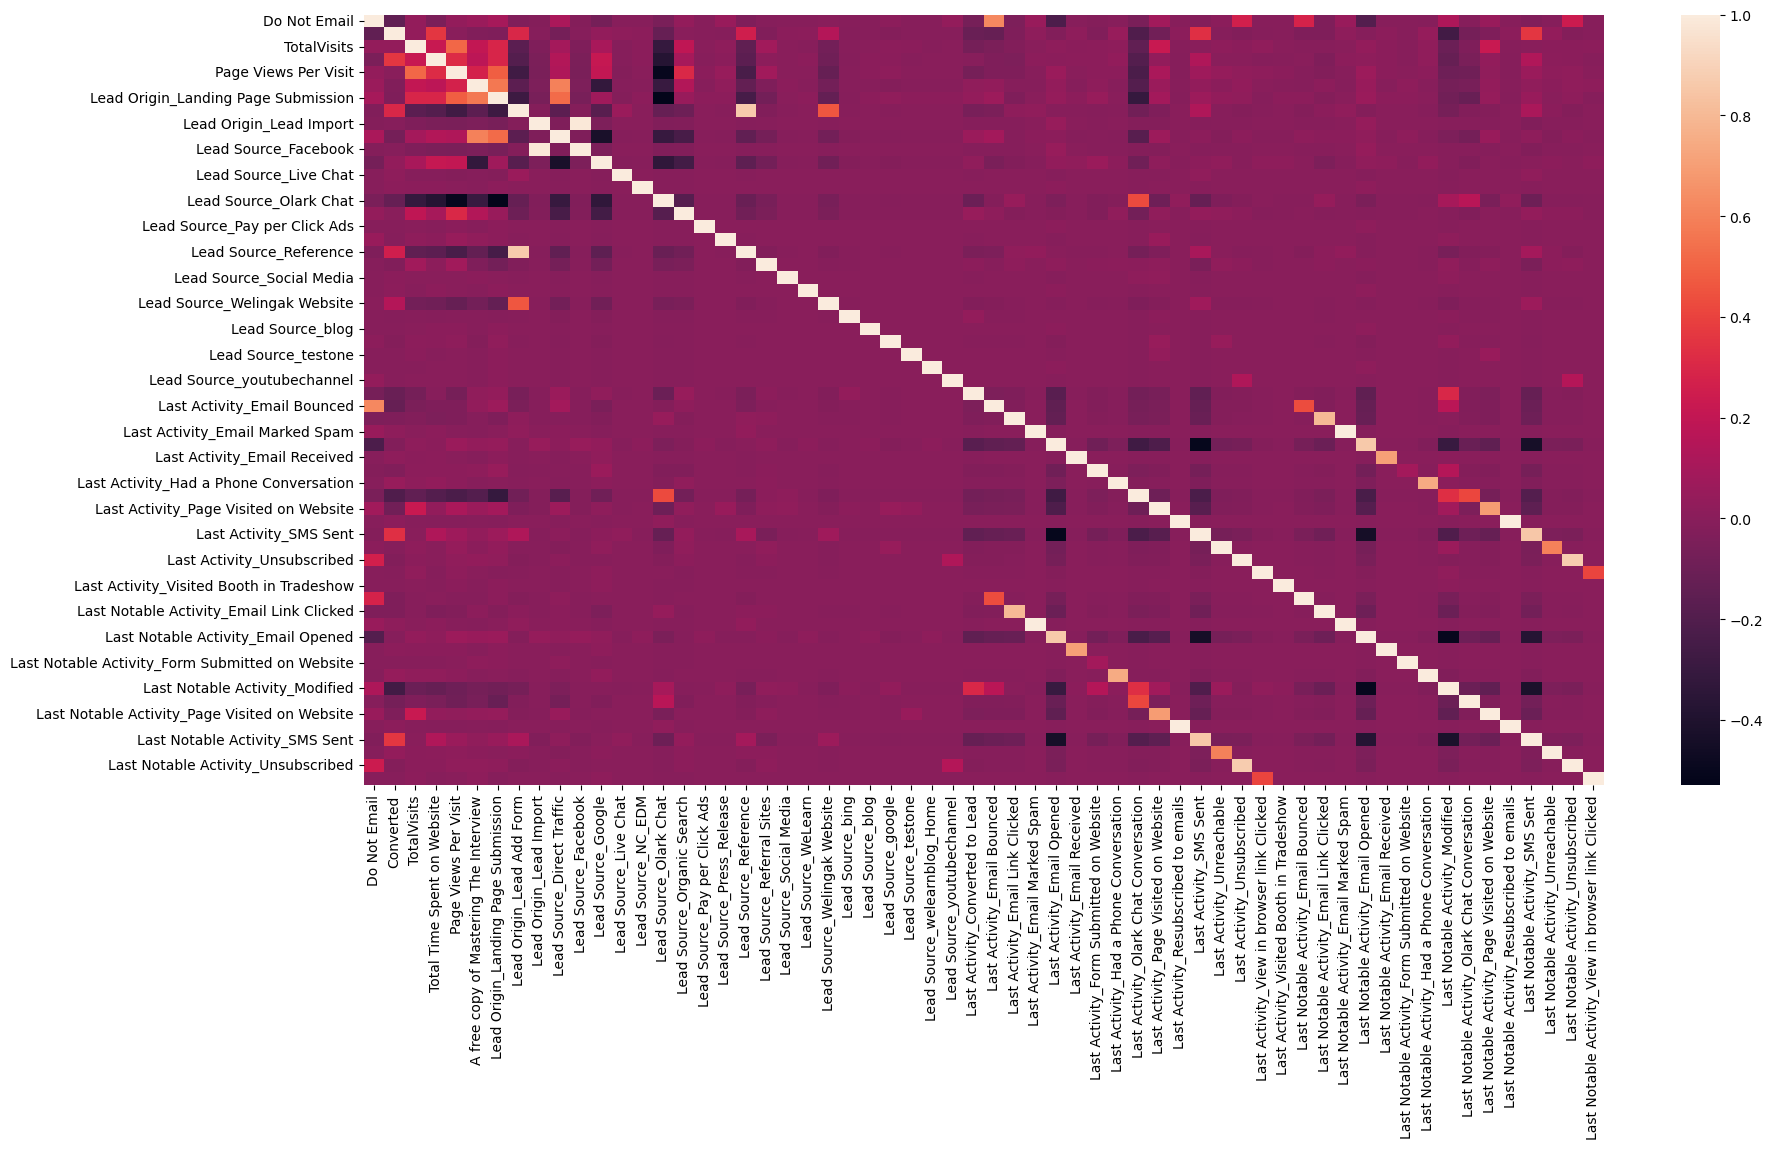

In [46]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(leads_data.corr())
plt.show()

In [47]:
leads_data.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.140786,0.035715,-0.046192,0.036403,0.058023,0.099661,-0.031468,-0.016857,0.112262,...,-0.003073,-0.011505,0.122812,-0.012911,0.050922,-0.003073,-0.029608,-0.010516,0.241202,-0.003073
Converted,-0.140786,1.000000,0.032855,0.359261,0.000260,-0.030860,-0.037481,0.300775,-0.009328,-0.073186,...,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194
TotalVisits,0.035715,0.032855,1.000000,0.219723,0.511068,0.201064,0.290347,-0.169742,-0.037808,0.095571,...,-0.003146,0.022317,-0.107875,-0.037993,0.227450,-0.007468,-0.001620,0.005513,0.003061,0.009819
Total Time Spent on Website,-0.046192,0.359261,0.219723,1.000000,0.318350,0.177435,0.292571,-0.188526,-0.050742,0.140793,...,-0.003772,0.022925,-0.127020,-0.050877,0.028713,-0.009298,0.137169,0.009594,0.003951,-0.007584
Page Views Per Visit,0.036403,0.000260,0.511068,0.318350,1.000000,0.275664,0.484119,-0.268415,-0.056068,0.133118,...,-0.001798,0.013928,-0.096466,-0.088593,0.026102,-0.011516,0.059445,0.019415,0.021668,0.001457
A free copy of Mastering The Interview,0.058023,-0.030860,0.201064,0.177435,0.275664,1.000000,0.564863,-0.162281,-0.039353,0.595600,...,0.015365,-0.008775,-0.073831,-0.059317,0.035753,-0.007173,0.025631,0.003254,0.022491,0.015365
Lead Origin_Landing Page Submission,0.099661,-0.037481,0.290347,0.292571,0.484119,0.564863,1.000000,-0.282445,-0.062195,0.523695,...,0.009722,0.002608,-0.084643,-0.118758,0.043041,-0.011337,0.052736,-0.000847,0.018171,-0.011337
Lead Origin_Lead Add Form,-0.031468,0.300775,-0.169742,-0.188526,-0.268415,-0.162281,-0.282445,1.000000,-0.015064,-0.163208,...,-0.002746,-0.010282,-0.068634,-0.024714,-0.015572,-0.002746,0.115585,0.007222,-0.018465,-0.002746
Lead Origin_Lead Import,-0.016857,-0.009328,-0.037808,-0.050742,-0.056068,-0.039353,-0.062195,-0.015064,1.000000,-0.035939,...,-0.000605,-0.002264,-0.007204,-0.008263,-0.010976,-0.000605,-0.027600,-0.003426,-0.004066,-0.000605
Lead Source_Direct Traffic,0.112262,-0.073186,0.095571,0.140793,0.133118,0.595600,0.523695,-0.163208,-0.035939,1.000000,...,0.016824,-0.012026,-0.042726,-0.072067,0.054548,-0.006551,0.016095,-0.016425,0.004851,-0.006551


There doesn't seem to much correlation between the variables so we need not drop any variables.

-----

## Step 8: Building a logistic regression model

Since there are a large number of features, instead of proceeding in a bottom-up manner by adding features one by one to build the model, we shall proceed in a top-down manner. We will use Recursive Feature Elimination (RFE) to build the model.

In [48]:
# Import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [49]:
# Create logistic regression object
logreg = LogisticRegression()

In [50]:
# Use RFE to fit the data to a logistic regression model
# We shall select 20 prominent features for the model
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [51]:
# Examine the selected features
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False])

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 39),
 ('Lead Origin_Landing Page Submission', False, 29),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Pay per Click Ads', False, 28),
 ('Lead Source_Press_Release', False, 27),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 38),
 ('Lead Source_blog', False, 12),
 ('Lead Source_google', True, 1),
 ('L

In [53]:
# Get the columns selected by RFE
selected_cols = X_train.columns[rfe.support_]
selected_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

#### Assessing the model with StatsModels

In [54]:
import statsmodels.api as sm

#### Model 1

In [55]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2783.5
Date:                Tue, 18 Jul 2023   Deviance:                       5567.1
Time:                        23:01:07   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3665
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3595      0.067      5.372      0.000       0.228       0.491
Do Not Email                                     -1.5666      0.192     -8.152      0.000      -1.943      -1.190
Total Time Spent on Website                       1.1466      0.040     28.969      0.000       1.069       1.224
Lead Origin_Lead Add Form                         1.9613      0.920      2.132      0.033       0.159       3.764
Lead Origin_Lead Import                           1.5498      0.433      3.582      0.000       0.702       2.398
Lead Source_Olark Chat                            1.1665      0.101     11.513      0.000       0.968       1.365
Lead Source_Reference                             2.2832      0.944      2.420      0.016       0.434       4.133
Lead Source_Social Media                          2.1305      1.440      1.479      0.139      -0.693       4.954
Lead Source_Welingak Website                      3.8458      1.170      3.286      0.001       1.552       6.140
Lead Source_google                              -20.3126   1.26e+04     -0.002      0.999   -2.47e+04    2.47e+04
Last Activity_Converted to Lead                  -1.1082      0.221     -5.016      0.000      -1.541      -0.675
Last Activity_Email Bounced                      -1.3524      0.416     -3.251      0.001      -2.168      -0.537
Last Activity_Email Link Clicked                 -0.4218      0.366     -1.154      0.249      -1.138       0.295
Last Activity_Had a Phone Conversation            1.7564      0.770      2.280      0.023       0.247       3.266
Last Activity_Olark Chat Conversation            -1.4409      0.190     -7.570      0.000      -1.814      -1.068
Last Activity_Page Visited on Website            -0.4760      0.212     -2.245      0.025      -0.892      -0.060
Last Notable Activity_Email Link Clicked         -1.4433      0.440     -3.279      0.001      -2.306      -0.581
Last Notable Activity_Email Opened               -1.4015      0.085    -16.470      0.000      -1.568      -1.235
Last Notable Activity_Modified                   -1.6760      0.104    -16.152      0.000      -1.879      -1.473
Last Notable Activity_Olark Chat Conversation    -1.4800      0.363     -4.075      0.000      -2.192      -0.768
Last Notable Activity_Page Visited on Website    -1.2173      0.287     -4.241      0.000      -1.780      -0.655
=================================================================================================================
"""

Let's check the VIF to ascertain which columns can be further eliminated to improve the accuracy of the model.

In [56]:
# Import VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.42
5,Lead Source_Reference,47.99
7,Lead Source_Welingak Website,15.47
11,Last Activity_Email Link Clicked,3.07
15,Last Notable Activity_Email Link Clicked,3.01
14,Last Activity_Page Visited on Website,2.44
17,Last Notable Activity_Modified,2.37
19,Last Notable Activity_Page Visited on Website,2.19
13,Last Activity_Olark Chat Conversation,2.13
10,Last Activity_Email Bounced,1.82


The VIFs for a few features are quite high. Let's drop the feature with the highest one and see how it affects the model.

Since the VIF for `Lead Origin_Lead Add Form` is very high, let's drop this feature.

In [58]:
cols = selected_cols.drop(['Lead Origin_Lead Add Form'])

#### Model 2

In [59]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.1
Date:                Tue, 18 Jul 2023   Deviance:                       5572.1
Time:                        23:01:08   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3637      0.067      5.438      0.000       0.233       0.495
Do Not Email                                     -1.5701      0.192     -8.175      0.000      -1.947      -1.194
Total Time Spent on Website                       1.1443      0.040     28.955      0.000       1.067       1.222
Lead Origin_Lead Import                           1.5445      0.433      3.570      0.000       0.697       2.392
Lead Source_Olark Chat                            1.1650      0.101     11.516      0.000       0.967       1.363
Lead Source_Reference                             4.2394      0.223     18.974      0.000       3.801       4.677
Lead Source_Social Media                          2.1272      1.440      1.477      0.140      -0.695       4.949
Lead Source_Welingak Website                      5.8023      0.727      7.976      0.000       4.376       7.228
Lead Source_google                              -20.3151   1.26e+04     -0.002      0.999   -2.47e+04    2.47e+04
Last Activity_Converted to Lead                  -1.1100      0.221     -5.026      0.000      -1.543      -0.677
Last Activity_Email Bounced                      -1.3516      0.416     -3.250      0.001      -2.167      -0.537
Last Activity_Email Link Clicked                 -0.4241      0.365     -1.161      0.246      -1.140       0.292
Last Activity_Had a Phone Conversation            1.7527      0.770      2.275      0.023       0.243       3.263
Last Activity_Olark Chat Conversation            -1.4439      0.190     -7.588      0.000      -1.817      -1.071
Last Activity_Page Visited on Website            -0.4726      0.211     -2.235      0.025      -0.887      -0.058
Last Notable Activity_Email Link Clicked         -1.4444      0.440     -3.283      0.001      -2.307      -0.582
Last Notable Activity_Email Opened               -1.4024      0.085    -16.486      0.000      -1.569      -1.236
Last Notable Activity_Modified                   -1.6768      0.104    -16.162      0.000      -1.880      -1.473
Last Notable Activity_Olark Chat Conversation    -1.4798      0.363     -4.076      0.000      -2.191      -0.768
Last Notable Activity_Page Visited on Website    -1.2094      0.286     -4.228      0.000      -1.770      -0.649
=================================================================================================================
"""

In [60]:
# Check the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Email Link Clicked,3.07
14,Last Notable Activity_Email Link Clicked,3.01
13,Last Activity_Page Visited on Website,2.44
16,Last Notable Activity_Modified,2.37
18,Last Notable Activity_Page Visited on Website,2.19
12,Last Activity_Olark Chat Conversation,2.12
9,Last Activity_Email Bounced,1.82
0,Do Not Email,1.80
3,Lead Source_Olark Chat,1.66
17,Last Notable Activity_Olark Chat Conversation,1.35


The VIF for all features is well under 5.0 which is good.

However, the P-values for some of the features are quite higher than the threshold 0.05. So let's try dropping some of those features to see if there's any improvement in the model.

In [61]:
cols = cols.drop(['Lead Source_google'])

#### Model 3

In [62]:
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2787.2
Date:                Tue, 18 Jul 2023   Deviance:                       5574.4
Time:                        23:01:08   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3635      0.067      5.436      0.000       0.232       0.495
Do Not Email                                     -1.5696      0.192     -8.175      0.000      -1.946      -1.193
Total Time Spent on Website                       1.1439      0.040     28.951      0.000       1.066       1.221
Lead Origin_Lead Import                           1.5450      0.433      3.571      0.000       0.697       2.393
Lead Source_Olark Chat                            1.1653      0.101     11.518      0.000       0.967       1.364
Lead Source_Reference                             4.2404      0.223     18.977      0.000       3.802       4.678
Lead Source_Social Media                          2.1349      1.441      1.482      0.138      -0.689       4.958
Lead Source_Welingak Website                      5.8031      0.727      7.977      0.000       4.377       7.229
Last Activity_Converted to Lead                  -1.1062      0.221     -5.010      0.000      -1.539      -0.673
Last Activity_Email Bounced                      -1.3502      0.416     -3.247      0.001      -2.165      -0.535
Last Activity_Email Link Clicked                 -0.4208      0.365     -1.152      0.249      -1.137       0.295
Last Activity_Had a Phone Conversation            1.7542      0.770      2.277      0.023       0.244       3.264
Last Activity_Olark Chat Conversation            -1.4408      0.190     -7.572      0.000      -1.814      -1.068
Last Activity_Page Visited on Website            -0.4841      0.211     -2.294      0.022      -0.898      -0.071
Last Notable Activity_Email Link Clicked         -1.4477      0.440     -3.291      0.001      -2.310      -0.586
Last Notable Activity_Email Opened               -1.4023      0.085    -16.485      0.000      -1.569      -1.236
Last Notable Activity_Modified                   -1.6801      0.104    -16.199      0.000      -1.883      -1.477
Last Notable Activity_Olark Chat Conversation    -1.4829      0.363     -4.085      0.000      -2.194      -0.771
Last Notable Activity_Page Visited on Website    -1.1977      0.286     -4.192      0.000      -1.758      -0.638
=================================================================================================================
"""

In [63]:
# Check the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Email Link Clicked,3.07
13,Last Notable Activity_Email Link Clicked,3.01
12,Last Activity_Page Visited on Website,2.44
15,Last Notable Activity_Modified,2.37
17,Last Notable Activity_Page Visited on Website,2.19
11,Last Activity_Olark Chat Conversation,2.12
8,Last Activity_Email Bounced,1.81
0,Do Not Email,1.80
3,Lead Source_Olark Chat,1.66
16,Last Notable Activity_Olark Chat Conversation,1.35


We have another feature `Last Activity_Email Link Clicked` whose P-value is quite high. Let's try dropping this feature and building the next iteration of the model.

In [64]:
cols = cols.drop(['Last Activity_Email Link Clicked'])

#### Model 4

In [65]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2787.9
Date:                Tue, 18 Jul 2023   Deviance:                       5575.8
Time:                        23:01:08   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3656
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3636      0.067      5.437      0.000       0.233       0.495
Do Not Email                                     -1.5662      0.192     -8.155      0.000      -1.943      -1.190
Total Time Spent on Website                       1.1441      0.040     28.960      0.000       1.067       1.222
Lead Origin_Lead Import                           1.5499      0.433      3.581      0.000       0.702       2.398
Lead Source_Olark Chat                            1.1623      0.101     11.499      0.000       0.964       1.360
Lead Source_Reference                             4.2361      0.223     18.968      0.000       3.798       4.674
Lead Source_Social Media                          2.1340      1.441      1.481      0.139      -0.690       4.958
Lead Source_Welingak Website                      5.8023      0.728      7.975      0.000       4.376       7.228
Last Activity_Converted to Lead                  -1.0844      0.220     -4.927      0.000      -1.516      -0.653
Last Activity_Email Bounced                      -1.3427      0.416     -3.227      0.001      -2.158      -0.527
Last Activity_Had a Phone Conversation            1.7634      0.771      2.286      0.022       0.252       3.275
Last Activity_Olark Chat Conversation            -1.4168      0.189     -7.487      0.000      -1.788      -1.046
Last Activity_Page Visited on Website            -0.4624      0.210     -2.199      0.028      -0.874      -0.050
Last Notable Activity_Email Link Clicked         -1.8675      0.246     -7.578      0.000      -2.350      -1.384
Last Notable Activity_Email Opened               -1.4018      0.085    -16.480      0.000      -1.569      -1.235
Last Notable Activity_Modified                   -1.7022      0.102    -16.666      0.000      -1.902      -1.502
Last Notable Activity_Olark Chat Conversation    -1.5052      0.363     -4.151      0.000      -2.216      -0.795
Last Notable Activity_Page Visited on Website    -1.2194      0.285     -4.276      0.000      -1.778      -0.661
=================================================================================================================
"""

In [66]:
# Check the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_Page Visited on Website,2.41
14,Last Notable Activity_Modified,2.24
16,Last Notable Activity_Page Visited on Website,2.18
10,Last Activity_Olark Chat Conversation,2.08
8,Last Activity_Email Bounced,1.81
0,Do Not Email,1.80
3,Lead Source_Olark Chat,1.66
15,Last Notable Activity_Olark Chat Conversation,1.35
7,Last Activity_Converted to Lead,1.28
1,Total Time Spent on Website,1.21


Let's drop feature `Lead Source_Social Media` which has a high P-value.

In [67]:
cols = cols.drop(['Lead Source_Social Media'])

#### Model 5

In [68]:
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2788.9
Date:                Tue, 18 Jul 2023   Deviance:                       5577.7
Time:                        23:01:08   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3654
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3642      0.067      5.446      0.000       0.233       0.495
Do Not Email                                     -1.5673      0.192     -8.163      0.000      -1.944      -1.191
Total Time Spent on Website                       1.1437      0.040     28.954      0.000       1.066       1.221
Lead Origin_Lead Import                           1.5489      0.433      3.579      0.000       0.701       2.397
Lead Source_Olark Chat                            1.1595      0.101     11.475      0.000       0.961       1.358
Lead Source_Reference                             4.2348      0.223     18.964      0.000       3.797       4.673
Lead Source_Welingak Website                      5.8013      0.728      7.973      0.000       4.375       7.227
Last Activity_Converted to Lead                  -1.0848      0.220     -4.929      0.000      -1.516      -0.653
Last Activity_Email Bounced                      -1.3416      0.416     -3.224      0.001      -2.157      -0.526
Last Activity_Had a Phone Conversation            1.7628      0.771      2.285      0.022       0.251       3.275
Last Activity_Olark Chat Conversation            -1.4036      0.189     -7.443      0.000      -1.773      -1.034
Last Activity_Page Visited on Website            -0.4500      0.210     -2.143      0.032      -0.861      -0.038
Last Notable Activity_Email Link Clicked         -1.8671      0.246     -7.576      0.000      -2.350      -1.384
Last Notable Activity_Email Opened               -1.4018      0.085    -16.481      0.000      -1.568      -1.235
Last Notable Activity_Modified                   -1.7021      0.102    -16.666      0.000      -1.902      -1.502
Last Notable Activity_Olark Chat Conversation    -1.5171      0.362     -4.188      0.000      -2.227      -0.807
Last Notable Activity_Page Visited on Website    -1.2319      0.285     -4.324      0.000      -1.790      -0.673
=================================================================================================================
"""

In [69]:
# Check the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Page Visited on Website,2.41
13,Last Notable Activity_Modified,2.24
15,Last Notable Activity_Page Visited on Website,2.18
9,Last Activity_Olark Chat Conversation,2.08
7,Last Activity_Email Bounced,1.81
0,Do Not Email,1.80
3,Lead Source_Olark Chat,1.65
14,Last Notable Activity_Olark Chat Conversation,1.35
6,Last Activity_Converted to Lead,1.28
1,Total Time Spent on Website,1.21


Now that we have P-values for all the variables below the threshold and the VIF also looks good, we have obtained a good enough model.

-----

## Step 9: Inspecting the confusion matrix and other metrics

In [70]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.227789
1012    0.040607
9226    0.232412
4750    0.904104
7987    0.725044
1281    0.804193
2880    0.114506
4971    0.927011
7536    0.890587
1248    0.687200
dtype: float64

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22778864, 0.04060708, 0.23241205, 0.90410381, 0.72504449,
       0.80419261, 0.11450629, 0.9270107 , 0.89058663, 0.68720013])

In [72]:
# Create a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_Actual': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted_Actual,Converted_Prob,Lead_ID
0,0,0.227789,3009
1,0,0.040607,1012
2,0,0.232412,9226
3,1,0.904104,4750
4,1,0.725044,7987


In [73]:
# Create a new column 'Converted_Predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Converted_Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted_Actual,Converted_Prob,Lead_ID,Converted_Predicted
0,0,0.227789,3009,0
1,0,0.040607,1012,0
2,0,0.232412,9226,0
3,1,0.904104,4750,1
4,1,0.725044,7987,1


Let's check the confusion matrix to determine how this model is doing.

In [74]:
from sklearn import metrics

In [75]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted_Actual'], y_train_pred_final['Converted_Predicted'] )
print(confusion)

[[3417  488]
 [ 791 1655]]


In [76]:
# Let's check the overall accuracy
acc = metrics.accuracy_score(y_train_pred_final['Converted_Actual'], y_train_pred_final['Converted_Predicted'])
print(acc)

0.7986143914344198


The accuracy of the final model is 79.86%.

#### Metrics beyond simply accuracy

In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP + FN)

0.6766148814390842

In [79]:
# Let us calculate specificity
TN / float(TN + FP)

0.8750320102432778

In [80]:
# Calculate false postive rate
FP/ float(TN + FP)

0.12496798975672214

In [81]:
# Positive predictive value 
TP / float(TP + FP)

0.7722818478768082

In [82]:
# Negative predictive value
TN / float(TN + FN)

0.8120247148288974

-----

## Step 10: Plotting the ROC curve and finding optimal cutoff

#### Plotting the ROC curve

In [83]:
# Function to draw the ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Converted_Actual'],
                                         y_train_pred_final['Converted_Prob'],
                                         drop_intermediate = False)

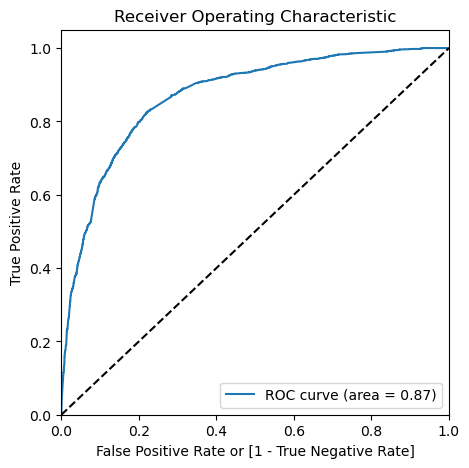

In [85]:
draw_roc(y_train_pred_final['Converted_Actual'], y_train_pred_final['Converted_Prob'])

#### Finding the optimal cutoff

In [86]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_Actual,Converted_Prob,Lead_ID,Converted_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.227789,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.040607,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.232412,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.904104,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.725044,7987,1,1,1,1,1,1,1,1,1,0,0


In [87]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs
from sklearn.metrics import confusion_matrix
cutoff_df = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

In [88]:
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_Actual'], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    
    specificity = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensitivity = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.578019     0.972200     0.331114
0.2          0.2  0.723193     0.915781     0.602561
0.3          0.3  0.794206     0.829518     0.772087
0.4          0.4  0.800976     0.764922     0.823560
0.5          0.5  0.798614     0.676615     0.875032
0.6          0.6  0.790112     0.599755     0.909347
0.7          0.7  0.760195     0.463614     0.945967
0.8          0.8  0.737679     0.373671     0.965685
0.9          0.9  0.681467     0.192968     0.987452


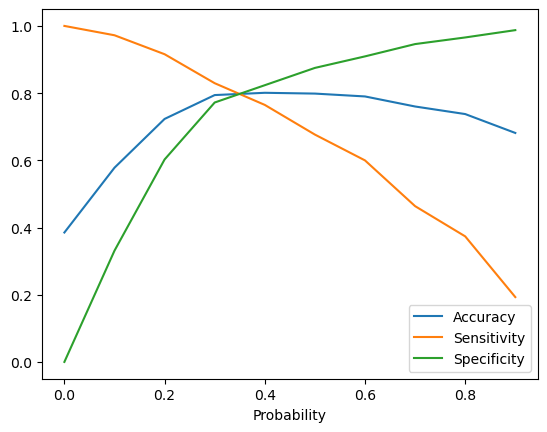

In [89]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

From the above plot, 0.35 is the optimal point to take as the cutoff probability.

In [90]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted_Actual,Converted_Prob,Lead_ID,Converted_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.227789,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.040607,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.232412,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.904104,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.725044,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [91]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final['Converted_Actual'], y_train_pred_final['Final_Predicted'])

0.7978271138403401

In [92]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted_Actual'], y_train_pred_final['Final_Predicted'] )
confusion2

array([[3087,  818],
       [ 466, 1980]])

In [93]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP + FN)

0.8094848732624693

In [95]:
# Let us calculate specificity
TN / float(TN + FP)

0.7905249679897567

In [96]:
# Calculate false postive rate
FP/ float(TN + FP)

0.20947503201024328

In [97]:
# Positive predictive value 
TP / float(TP + FP)

0.7076483202287348

In [98]:
# Negative predictive value
TN / float(TN + FN)

0.8688432310723332

In [99]:
# Precision
TP / float(TP + FP)

0.7076483202287348

In [100]:
# Recall
TP / float(TP + FN)

0.8094848732624693

-----

## Step 11: Making predictions using the final model

In [101]:
# Transform the test data
X_test[scale_features] = scaler.transform(X_test[scale_features])

In [102]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [103]:
X_test_sm = sm.add_constant(X_test)

Let's make predictions on the test set.

In [104]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.151298
1490    0.754172
7936    0.130264
4216    0.867678
3830    0.153194
1800    0.130740
6507    0.405781
4821    0.349146
4223    0.972952
4714    0.232412
dtype: float64

In [105]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [106]:
# Let's see the head
y_pred_1.head()

,0
3271,0.151298
1490,0.754172
7936,0.130264
4216,0.867678
3830,0.153194


In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [108]:
# Putting Lead_ID as the index
y_test_df['Lead_ID'] = y_test_df.index

In [109]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [110]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [111]:
y_pred_final.head()

,Converted,Lead_ID,0
0,0,3271,0.151298
1,1,1490,0.754172
2,0,7936,0.130264
3,1,4216,0.867678
4,0,3830,0.153194


In [112]:
# Renaming the column 
y_pred_final = y_pred_final.rename(columns={0 : 'Converted_Prob'})

In [113]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead_ID', 'Converted', 'Converted_Prob'], axis=1)

In [114]:
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob
0,3271,0,0.151298
1,1490,1,0.754172
2,7936,0,0.130264
3,4216,1,0.867678
4,3830,0,0.153194


In [115]:
y_pred_final['Final_Predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)

In [116]:
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob,Final_Predicted
0,3271,0,0.151298,0
1,1490,1,0.754172,1
2,7936,0,0.130264,0
3,4216,1,0.867678,1
4,3830,0,0.153194,0


-----

## Step 12: Model evaluation

In [117]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['Final_Predicted'])

0.786265148733015

In [118]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Final_Predicted'])
confusion3

array([[1367,  367],
       [ 215,  774]])

In [119]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [120]:
# Calculate Precision
TP / (TP + FP)

0.6783523225241017

In [121]:
# Calculate Recall
TP / (TP + FN)

0.782608695652174

-----

In [122]:
# Top 3 variables in the model
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                     5.801344
Lead Source_Reference                            4.234843
Last Activity_Had a Phone Conversation           1.762827
Lead Origin_Lead Import                          1.548925
Lead Source_Olark Chat                           1.159518
Total Time Spent on Website                      1.143704
const                                            0.364224
Last Activity_Page Visited on Website           -0.449979
Last Activity_Converted to Lead                 -1.084776
Last Notable Activity_Page Visited on Website   -1.231874
Last Activity_Email Bounced                     -1.341597
Last Notable Activity_Email Opened              -1.401780
Last Activity_Olark Chat Conversation           -1.403578
Last Notable Activity_Olark Chat Conversation   -1.517099
Do Not Email                                    -1.567330
Last Notable Activity_Modified                  -1.702130
Last Notable Activity_Email Link Clicked        -1.867105
dtype: float64